# Analysis Data Text

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation

## Load Data

Load data **`indonlu_smsa_doc-sentiment-prosa.tsv`** with column **text** and **label**

In [ ]:
df = pd.read_csv('train_data.csv')
df

,tweets,labels
0,tempat yang nyaman untuk berkumpul dengan tema...,positive
1,"memang banyak bacot sih , omongan doang gede b...",negative
2,"buat yang berkunjung ke bandung , yang ingin m...",positive
3,restoran menyajikan makanan khas sunda yang en...,positive
4,"kalau travelling ke bandung , wajib makan bata...",positive
...,...,...
9895,warung nasi ampera memiliki konsep rumah makan...,positive
9896,"mbak della sangat baik dan ramah , makanna nya...",positive
9897,suasana nya sangat romantis jika makan malam d...,positive
9898,masyarakat tidak kecewa jika dipimpin oleh jok...,positive


In [ ]:
# 1. jumlah data yang pakai (11rb; train:10rb, backtest: 1rb)
# 2. datanya darimana (twitter/kaggle)
# 3. jumlah labelnya (2: positive/negative)
# 4. rentang waktu pengambilan data ()

In [ ]:
def clean_text(text):
    text = text.replace(",","")
    return text
df

,tweets,labels
0,tempat yang nyaman untuk berkumpul dengan tema...,positive
1,"memang banyak bacot sih , omongan doang gede b...",negative
2,"buat yang berkunjung ke bandung , yang ingin m...",positive
3,restoran menyajikan makanan khas sunda yang en...,positive
4,"kalau travelling ke bandung , wajib makan bata...",positive
...,...,...
9895,warung nasi ampera memiliki konsep rumah makan...,positive
9896,"mbak della sangat baik dan ramah , makanna nya...",positive
9897,suasana nya sangat romantis jika makan malam d...,positive
9898,masyarakat tidak kecewa jika dipimpin oleh jok...,positive


In [ ]:
df['length_of_tweet'] = df['tweet'].apply(lambda x: len(x))
df

,tweet,label,length_of_tweet
0,tempat yang nyaman untuk berkumpul dengan tema...,positive,207
1,"memang banyak bacot sih , omongan doang gede b...",negative,207
2,"buat yang berkunjung ke bandung , yang ingin m...",positive,257
3,restoran menyajikan makanan khas sunda yang en...,positive,253
4,"kalau travelling ke bandung , wajib makan bata...",positive,251
...,...,...,...
9895,warung nasi ampera memiliki konsep rumah makan...,positive,302
9896,"mbak della sangat baik dan ramah , makanna nya...",positive,271
9897,suasana nya sangat romantis jika makan malam d...,positive,286
9898,masyarakat tidak kecewa jika dipimpin oleh jok...,positive,54


In [ ]:
def normalize_column(values):
    min_values = min(values)
    max_values = max(values)
    
    new_values = []
    for value in values:
        new_value = (value - min_values) / (max_values - min_values)
        new_values.append(new_value)
    return new_values

In [ ]:
df['normalized_length_of_tweet'] = normalize_column(df['length_of_tweet'])
df

,tweet,label,length_of_tweet,normalized_length_of_tweet
0,tempat yang nyaman untuk berkumpul dengan tema...,positive,207,0.361702
1,"memang banyak bacot sih , omongan doang gede b...",negative,207,0.361702
2,"buat yang berkunjung ke bandung , yang ingin m...",positive,257,0.450355
3,restoran menyajikan makanan khas sunda yang en...,positive,253,0.443262
4,"kalau travelling ke bandung , wajib makan bata...",positive,251,0.439716
...,...,...,...,...
9895,warung nasi ampera memiliki konsep rumah makan...,positive,302,0.530142
9896,"mbak della sangat baik dan ramah , makanna nya...",positive,271,0.475177
9897,suasana nya sangat romantis jika makan malam d...,positive,286,0.501773
9898,masyarakat tidak kecewa jika dipimpin oleh jok...,positive,54,0.090426


In [ ]:
df['normalized_length_of_tweet']

0       0.361702
1       0.361702
2       0.450355
3       0.443262
4       0.439716
          ...   
9895    0.530142
9896    0.475177
9897    0.501773
9898    0.090426
9899    0.368794
Name: normalized_length_of_tweet, Length: 9900, dtype: float64

Terlebih dahulu kita mengecek data yang akan kita proses sebelum dilakukan analisis

## Cek data 5 teratas dan terbawah

In [ ]:
# 5 teratas
df.head()

,tweet,label,length_of_tweet,normalized_length_of_tweet
0,tempat yang nyaman untuk berkumpul dengan tema...,positive,207,0.361702
1,"memang banyak bacot sih , omongan doang gede b...",negative,207,0.361702
2,"buat yang berkunjung ke bandung , yang ingin m...",positive,257,0.450355
3,restoran menyajikan makanan khas sunda yang en...,positive,253,0.443262
4,"kalau travelling ke bandung , wajib makan bata...",positive,251,0.439716


In [ ]:
# 5 teratas
df.tail()

,tweet,label,length_of_tweet,normalized_length_of_tweet
9895,warung nasi ampera memiliki konsep rumah makan...,positive,302,0.530142
9896,"mbak della sangat baik dan ramah , makanna nya...",positive,271,0.475177
9897,suasana nya sangat romantis jika makan malam d...,positive,286,0.501773
9898,masyarakat tidak kecewa jika dipimpin oleh jok...,positive,54,0.090426
9899,mau itu pak ridwan kamil atau pak dedi mulyadi...,positive,211,0.368794


## Cek jumlah kolom dan total data

Data yang diolah memiliki 2 kolom dan total data 11000

In [ ]:
df.shape

(9900, 4)

## Cek total duplikat data

Total data yang duplikat sejumlah 67

In [ ]:
df.loc[df.duplicated(keep=False)].sort_values('tweet')

,tweet,label,length_of_tweet,normalized_length_of_tweet
3747,aman gemstone menyediakan berbagai cincin / pe...,neutral,97,0.166667
8907,aman gemstone menyediakan berbagai cincin / pe...,neutral,97,0.166667
5060,apresiasi,positive,9,0.010638
9724,apresiasi,positive,9,0.010638
2864,banyak masyarakat yang tidak kecewa dengan kep...,positive,62,0.104610
...,...,...,...,...
8240,tidak menyesal,positive,14,0.019504
3440,tidak senang,negative,12,0.015957
9723,tidak senang,negative,12,0.015957
3131,wow iya kok hitam mental mahal amat ya kenapa ...,negative,112,0.193262


Menghilangkan data yang duplikat

In [ ]:
df = df.drop_duplicates()


Cek total data yang duplikat. Hasilnya data yang duplikat sudah tidak ada.

In [ ]:
df.duplicated().sum()

0

## Cek Missing Values

Jalankan perintah di bawah untuk mendeteksi missing values.

In [ ]:
df.isna().sum()

tweet                         0
label                         0
length_of_tweet               0
normalized_length_of_tweet    0
dtype: int64

Jalankan perintah untuk melihat persentase missing values dari setiap kolom. 

Terlihat pada setiap kolom memiliki persentase 0. Ini menandakan data kita aman dari missing values

In [ ]:
df.isna().sum()

tweet                         0
label                         0
length_of_tweet               0
normalized_length_of_tweet    0
dtype: int64

Cek kondisi data terakhir

In [ ]:
df

,tweet,label,length_of_tweet,normalized_length_of_tweet
0,tempat yang nyaman untuk berkumpul dengan tema...,positive,207,0.361702
1,"memang banyak bacot sih , omongan doang gede b...",negative,207,0.361702
2,"buat yang berkunjung ke bandung , yang ingin m...",positive,257,0.450355
3,restoran menyajikan makanan khas sunda yang en...,positive,253,0.443262
4,"kalau travelling ke bandung , wajib makan bata...",positive,251,0.439716
...,...,...,...,...
9894,tiap kegaduhan melanda presiden sowan ke prabo...,negative,122,0.210993
9895,warung nasi ampera memiliki konsep rumah makan...,positive,302,0.530142
9896,"mbak della sangat baik dan ramah , makanna nya...",positive,271,0.475177
9897,suasana nya sangat romantis jika makan malam d...,positive,286,0.501773


In [ ]:
# 1. Sentiment apa yang paling banyak (proporsi labels)
# 2. jumlah kata per row
# 3. Untuk masing masing label, 10 Kata apa yang paling sering muncul.
# 4. Apakah ada tweet yang duplicated, tapi beda label.

## Buat kolom baru bernama "total_char" berisi panjang karakter dari setiap teks.

In [ ]:
df['total_char'] = df['tweet'].apply(len)
df

,tweet,label,length_of_tweet,normalized_length_of_tweet,total_char
0,tempat yang nyaman untuk berkumpul dengan tema...,positive,207,0.361702,207
1,"memang banyak bacot sih , omongan doang gede b...",negative,207,0.361702,207
2,"buat yang berkunjung ke bandung , yang ingin m...",positive,257,0.450355,257
3,restoran menyajikan makanan khas sunda yang en...,positive,253,0.443262,253
4,"kalau travelling ke bandung , wajib makan bata...",positive,251,0.439716,251
...,...,...,...,...,...
9894,tiap kegaduhan melanda presiden sowan ke prabo...,negative,122,0.210993,122
9895,warung nasi ampera memiliki konsep rumah makan...,positive,302,0.530142,302
9896,"mbak della sangat baik dan ramah , makanna nya...",positive,271,0.475177,271
9897,suasana nya sangat romantis jika makan malam d...,positive,286,0.501773,286


Cek 5 data teratas lagi. Terlihat sekarang sudah ada kolom "total_char" yang berisi masing-masing panjang karakter dari setiap teks.


## Buat kolom baru bernama "total_word" berisi banyaknya kata dari setiap teks.

Cek 5 data teratas lagi. Terlihat sekarang sudah ada kolom "total_word" yang berisi masing-masing panjang kata dari setiap teks.

In [ ]:
df['total_word'] = df['tweet'].apply(lambda sent: len(sent.split()))

In [ ]:
# Cek data teratas
df.head()

,tweet,label,length_of_tweet,normalized_length_of_tweet,total_char,total_word
0,tempat yang nyaman untuk berkumpul dengan tema...,positive,207,0.361702,207,36
1,"memang banyak bacot sih , omongan doang gede b...",negative,207,0.361702,207,37
2,"buat yang berkunjung ke bandung , yang ingin m...",positive,257,0.450355,257,45
3,restoran menyajikan makanan khas sunda yang en...,positive,253,0.443262,253,41
4,"kalau travelling ke bandung , wajib makan bata...",positive,251,0.439716,251,48


In [ ]:
splited_tweet = df['tweet'].apply(lambda sent: sent.split())

In [ ]:
positive_words = {}
neutral_words = {}
negative_words = {}
for lab, twe in zip(df['label'], splited_tweet):
    if lab == 'positive':
        for word in twe:
            try:
                positive_words[word] += 1
            except KeyError:
                positive_words[word] = 1
    if lab == 'neutral':
        for word in twe:
            try:
                neutral_words[word] += 1
            except KeyError:
                neutral_words[word] = 1
    if lab == 'negative':
        for word in twe:
            try:
                negative_words[word] += 1
            except KeyError:
                negative_words[word] = 1

In [ ]:
kamus_negative = ['sombong']
kamus_positive = []

In [ ]:
contoh_text = df.loc[df.label == 'negative'].iloc[0].values

In [ ]:
score = 0
for word in contoh_text[0].split():
    if word in kamus_negative:
        score = score-1
    elif word in kamus_positive:
        score = score+1
    else:
        score = score+0
    

In [ ]:
sorted(positive_words.items(), key = lambda x:x[1], reverse=True)[:10]

[('.', 16518),
 (',', 10779),
 ('nya', 9866),
 ('yang', 6615),
 ('dan', 5807),
 ('di', 5573),
 ('enak', 2965),
 ('dengan', 2897),
 ('tempat', 2864),
 ('makanan', 2835)]

In [ ]:
sorted(negative_words.items(), key = lambda x:x[1], reverse=True)[:10]

[('.', 4352),
 (',', 3063),
 ('nya', 2078),
 ('tidak', 1732),
 ('yang', 1531),
 ('dan', 1129),
 ('di', 1054),
 ('saya', 967),
 ('ini', 694),
 ('saja', 593)]

In [ ]:
sorted(neutral_words.items(), key = lambda x:x[1], reverse=True)[:10]

[(',', 585),
 ('.', 501),
 ('di', 303),
 ('dan', 194),
 ('yang', 186),
 ('nya', 184),
 ('-', 158),
 ('untuk', 135),
 (':', 123),
 ('dengan', 121)]

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
np.quantile(df['total_char'], 0.01)

8.0

In [ ]:
df.loc[df.total_char<449].mean()

<ipython-input-53-6e83b5daaa1e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.loc[df.total_char<449].mean()


length_of_tweet               186.517720
normalized_length_of_tweet      0.325386
total_char                    186.517720
total_word                     32.554905
dtype: float64

In [ ]:
df.describe()

,length_of_tweet,normalized_length_of_tweet,total_char,total_word
count,9840.000000,9840.000000,9840.000000,9840.000000
mean,189.556098,0.330773,189.556098,33.060467
std,121.022216,0.214578,121.022216,21.176229
min,3.000000,0.000000,3.000000,1.000000
25%,90.000000,0.154255,90.000000,16.000000
50%,160.000000,0.278369,160.000000,28.000000
75%,276.250000,0.484486,276.250000,48.000000
max,567.000000,1.000000,567.000000,110.000000


<ipython-input-55-c017efa619e9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_word)


<Axes: xlabel='total_word', ylabel='Density'>

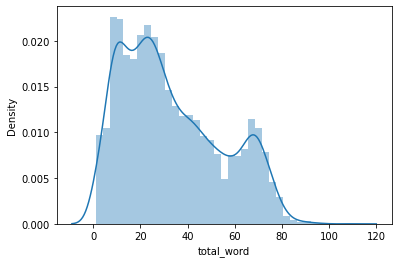

In [ ]:
sns.distplot(df.total_word)

In [ ]:
df['splitted_tweet'] = [tweet.split(" ") for tweet in df['tweet']]

In [ ]:
count_of_words = {}
for splitted_tweet in df['splitted_tweet']:
    for word in splitted_tweet:
        try:
            count_of_words[word] += 1
        except KeyError:
            count_of_words[word] = 1
#     break

In [ ]:
for x in count_of_words.items():
    print(x)
    break

('tempat', 3148)


<Axes: xlabel='label'>

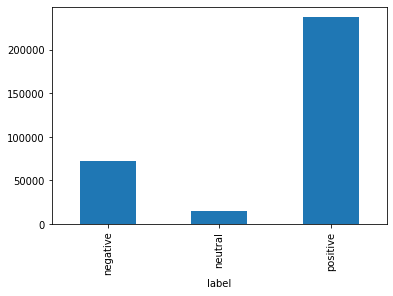

In [ ]:
df.groupby('label').total_word.sum().plot(kind='bar')

<Axes: xlabel='label'>

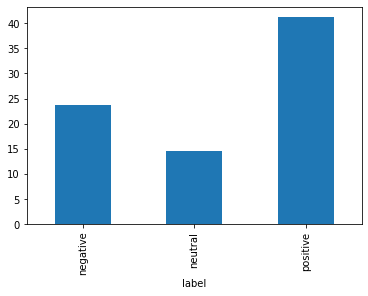

In [ ]:
df.groupby('label').total_word.mean().plot(kind='bar')

<Axes: xlabel='label'>

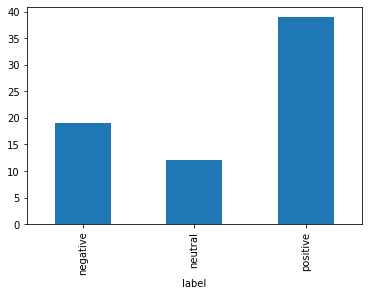

In [ ]:
df.groupby('label').total_word.median().plot(kind='bar')

## Univariate Analysis

### Descriptive Statistic

In [ ]:
#df = df.drop_duplicates()

In [ ]:
print(df['total_word'].mean())
print(df['total_char'].mean())

33.0604674796748
189.55609756097562


In [ ]:
df[['total_word','total_char']].mean()

total_word     33.060467
total_char    189.556098
dtype: float64

In [ ]:
df[['total_word','total_char']].median()

total_word     28.0
total_char    160.0
dtype: float64

In [ ]:
df[['total_word','total_char']].mode()

,total_word,total_char
0,25,145


#### Measures of Spread
Merupakan suatu cara untuk mendeskripsikan seberapa menyebar data yang ada.

In [ ]:
df[['total_word','total_char']].max() - df[['total_word','total_char']].min()

total_word    109
total_char    564
dtype: int64

Hasil dibawah menunjukkan nilai sisi bawah dari "total_char" tidak memiliki outlier, sedangkan sisi atas dari "total_char" memiliki outlier.

In [ ]:
import numpy as np

In [ ]:
# Cari nilai minimum


# Cari nilai maksimum


# Cari Quartile 1
quartile_1_char = np.quantile(df['total_char'],0.25)
quartile_1_word = np.quantile(df['total_word'],0.25)

print(f'Quartile 1 Total Char: {quartile_1_char}')
print(f'Quartile 1 Total Word: {quartile_1_word}')

# Cari Quartile 2
quartile_2_char = np.quantile(df['total_char'],0.5)
quartile_2_word = np.quantile(df['total_word'],0.5)
print(f'Quartile 2 Total Char: {quartile_2_char}')
print(f'Quartile 2 Total Word: {quartile_2_word}')

# Cari Quartile 3
quartile_3_char = np.quantile(df['total_char'],0.75)
quartile_3_word = np.quantile(df['total_word'],0.75)
print(f'Quartile 3 Total Char: {quartile_3_char}')
print(f'Quartile 3 Total Word: {quartile_3_word}')

# Cari IQR
iqr_char = quartile_3_char - quartile_1_char
iqr_word = quartile_3_word - quartile_1_word
print(f'IQR Total Char: {iqr_char}')
print(f'IQR Total Word: {iqr_word}')

# Cari batas bawah
lower_limit_char = quartile_1_char - (1.5*iqr_char)
lower_limit_word = quartile_1_word - (1.5*iqr_word)

print(f'Lower Limit Total Char: {lower_limit_char}')
print(f'Lower Limit Total Word: {lower_limit_word}')
# Cari batas atas
upper_limit_char = quartile_3_char + (1.5*iqr_char)
upper_limit_word = quartile_3_word + (1.5*iqr_word)

print(f'Upper Limit Total Char: {upper_limit_char}')
print(f'Upper Limit Total Word: {upper_limit_word}')

# Cek apakah ada outlier dari batas bawah
bottom_outlier_from_total_char = df.loc[df['total_char']<=lower_limit_char].index.to_list()
bottom_outlier_from_total_word = df.loc[df['total_word']<=lower_limit_word].index.to_list()
bottom_outlier = bottom_outlier_from_total_char + bottom_outlier_from_total_word
bottom_outlier = list(set(bottom_outlier))
print(f'Bottom Outlier: {bottom_outlier}')

# Cek apa ada outlier dari batas atas
upper_outlier_from_total_char = df.loc[df['total_char']>=upper_limit_char].index.to_list()
upper_outlier_from_total_word = df.loc[df['total_word']>=upper_limit_word].index.to_list()
upper_outlier = upper_outlier_from_total_char + upper_outlier_from_total_word
upper_outlier = list(set(upper_outlier))
print(f'Upper Outlier: {upper_outlier}')

Quartile 1 Total Char: 90.0
Quartile 1 Total Word: 16.0
Quartile 2 Total Char: 160.0
Quartile 2 Total Word: 28.0
Quartile 3 Total Char: 276.25
Quartile 3 Total Word: 48.0
IQR Total Char: 186.25
IQR Total Word: 32.0
Lower Limit Total Char: -189.375
Lower Limit Total Word: -32.0
Upper Limit Total Char: 555.625
Upper Limit Total Word: 96.0
Bottom Outlier: []
Upper Outlier: [3593, 2538, 8851, 3102]


In [ ]:
df = df.drop(upper_outlier)

In [ ]:
df['total_word'].mean()

33.03385522570151

<ipython-input-75-1faf0f71cb33>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_word'])


<Axes: xlabel='total_word', ylabel='Density'>

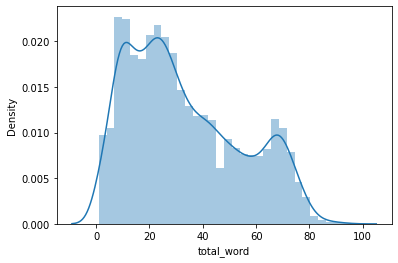

In [ ]:
sns.distplot(df['total_word'])

In [ ]:
df[['total_char', 'total_word']].var()

total_char    14605.055325
total_word      446.852641
dtype: float64

In [ ]:
df[['total_char', 'total_word']].std()

total_char    120.851377
total_word     21.138889
dtype: float64

#### Measures of Describe Shape of Distribution
Merupakan suatu cara untuk mendeskripsikan distribusi data berdasarkan suatu grafik.

In [ ]:
df[['total_char', 'total_word']].skew()

total_char    0.561633
total_word    0.534772
dtype: float64

#### Pie

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df['label'].value_counts()

positive    5758
negative    3061
neutral     1017
Name: label, dtype: int64

([<matplotlib.patches.Wedge at 0x7f18e0ac6490>,
 [Text(-0.29159537105240846, 1.0606470381709499, 'positive'),
  Text(-0.06215344486204681, -1.098242664119265, 'negative'),
  Text(1.042476544718992, -0.3510593307558585, 'neutral')])

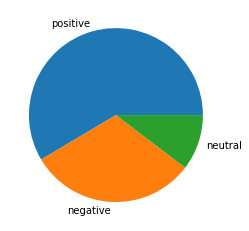

In [ ]:
plt.pie(df['label'].value_counts(), labels=df['label'].value_counts().index)

#### Histogram

In [ ]:
sorted(df['total_char'])

[3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13

(array([ 367.,  848.,  992.,  829., 1001.,  953.,  686.,  590.,  556.,
         432.,  413.,  343.,  311.,  376.,  448.,  407.,  208.,   55.,
          15.,    6.]),
 array([  3.  ,  29.55,  56.1 ,  82.65, 109.2 , 135.75, 162.3 , 188.85,
        215.4 , 241.95, 268.5 , 295.05, 321.6 , 348.15, 374.7 , 401.25,
        427.8 , 454.35, 480.9 , 507.45, 534.  ]),
 <BarContainer object of 20 artists>)

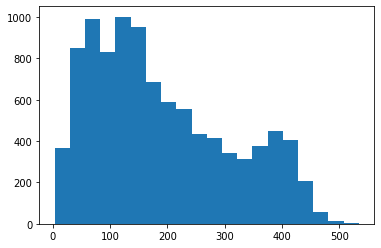

In [ ]:
plt.hist(df['total_char'],bins=20)

Berikut contoh visualisasi Histogram untuk melihat persebaran jumlah word (total_word).

Berdasarkan gambar di bawah terlihat rata-rata panjang kata dari data teks yang kita miliki ada pada sekitar 20-40 kata.

(array([ 421., 1049.,  956.,  692., 1058.,  970.,  590.,  613.,  567.,
         385.,  431.,  375.,  356.,  340.,  533.,  339.,  108.,   33.,
          13.,    7.]),
 array([ 1. ,  5.7, 10.4, 15.1, 19.8, 24.5, 29.2, 33.9, 38.6, 43.3, 48. ,
        52.7, 57.4, 62.1, 66.8, 71.5, 76.2, 80.9, 85.6, 90.3, 95. ]),
 <BarContainer object of 20 artists>)

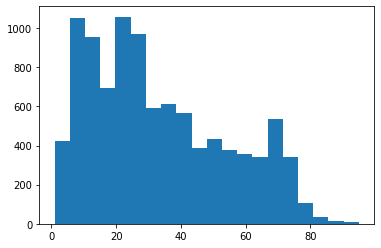

In [ ]:
plt.hist(df['total_word'],bins=20)

##### Histogram & Filter Sentiment

(array([ 317.,  355., 1152.,  974.,  775.,  619.,  586.,  740.,  227.,
          13.]),
 array([  4.,  57., 110., 163., 216., 269., 322., 375., 428., 481., 534.]),
 <BarContainer object of 10 artists>)

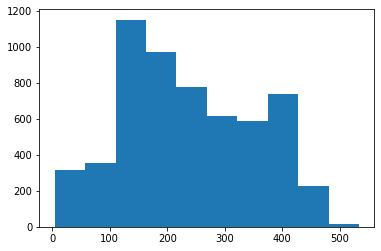

In [ ]:
plt.hist(df.loc[df.label == 'positive']['total_char'])

(array([627., 913., 665., 274., 188., 133.,  92., 111.,  49.,   9.]),
 array([  3. ,  55.3, 107.6, 159.9, 212.2, 264.5, 316.8, 369.1, 421.4,
        473.7, 526. ]),
 <BarContainer object of 10 artists>)

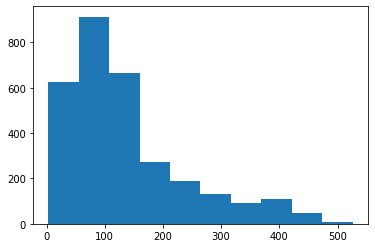

In [ ]:
plt.hist(df.loc[df.label == 'negative']['total_char'])

(array([255., 464., 161.,  71.,  26.,  24.,   7.,   2.,   4.,   3.]),
 array([ 17. ,  56.6,  96.2, 135.8, 175.4, 215. , 254.6, 294.2, 333.8,
        373.4, 413. ]),
 <BarContainer object of 10 artists>)

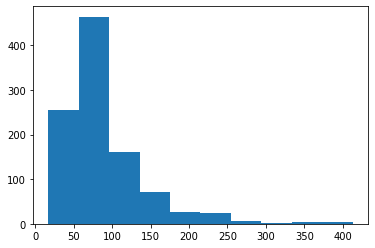

In [ ]:
plt.hist(df.loc[df.label == 'neutral']['total_char'])

#### Wordcloud

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud

In [ ]:
# Visualisasi Wordcloud
full_text = " ".join(df['tweet'])
wordcloud = WordCloud().generate(full_text)

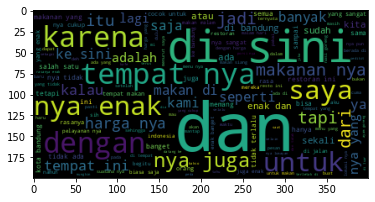

In [ ]:
plt.imshow(wordcloud)
plt.show()

##### Wordcloud & Filter Sentiment

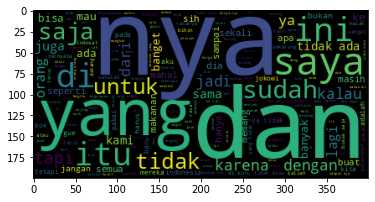

In [ ]:
# Visualisasi Wordcloud sentiment negatif
full_text = " ".join(df.loc[df.label == 'negative']['tweet'])
wordcloud = WordCloud().generate(full_text)

plt.imshow(wordcloud)
plt.show()

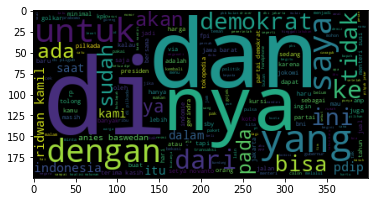

In [ ]:
# Visualisasi Wordcloud sentiment neutral

full_text = " ".join(df.loc[df.label == 'neutral']['tweet'])
wordcloud = WordCloud().generate(full_text)

plt.imshow(wordcloud)
plt.show()

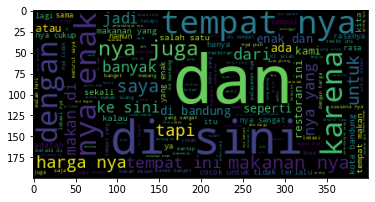

In [ ]:
# Visualisasi Wordcloud sentiment positif
full_text = " ".join(df.loc[df.label == 'positive']['tweet'])
wordcloud = WordCloud().generate(full_text)

plt.imshow(wordcloud)
plt.show()

# Analisa Korelasi Kata 'Enak' dengan label positive

In [ ]:
df['apakah_ada_kata_enak'] = df['tweet'].apply(lambda x: 1 if "saya" in x else 0)

In [ ]:
df['is_label_positive'] = df['label'].apply(lambda x: 1 if x == "positive" else 0)

In [ ]:
df[['apakah_ada_kata_enak', 'is_label_positive']].corr()

,apakah_ada_kata_enak,is_label_positive
apakah_ada_kata_enak,1.000000,0.174012
is_label_positive,0.174012,1.000000


In [ ]:
df[['tweet']]

,tweet
0,tempat yang nyaman untuk berkumpul dengan tema...
1,"memang banyak bacot sih , omongan doang gede b..."
2,"buat yang berkunjung ke bandung , yang ingin m..."
3,restoran menyajikan makanan khas sunda yang en...
4,"kalau travelling ke bandung , wajib makan bata..."
...,...
9894,tiap kegaduhan melanda presiden sowan ke prabo...
9895,warung nasi ampera memiliki konsep rumah makan...
9896,"mbak della sangat baik dan ramah , makanna nya..."
9897,suasana nya sangat romantis jika makan malam d...


## Bivariate Analysis

### Descriptive Statistic

Untuk melakukan Bivariate Analysis kita bisa mengkombinasikan pendekatan statistik dan visualisasi sama seperti Univariate Analysis.

#### Pearson Correlation
Pearson Correlation mengukur linear dependence antara 2 variabel X dan Y.
Hasilnya berupa angka diantara -1 dan 1, dimana:
- 1: total positive linear correlation,
- 0: no linear correlation, the two variables most likely do not affect each other
- -1: total negative linear correlation.

Pada hasil di bawah, antara "total_word" dan "total_char" memiliki korelasi positif karena mendekati nilai 1:



*   "total_world" -> "total_char": 0.99
*   "total_char" -> "total_world": 0.99



In [ ]:
df[['total_word','total_char']].corr()

,total_word,total_char
total_word,1.000000,0.991349
total_char,0.991349,1.000000


### Visualization

#### Scatter

Angka korelasi positif sebelumnya terkonfirmasi dari visualisasi scatter di bawah. Terlihat pola yang dihasilkan linier dari pojok kiri bawah ke pojok kanan atas.

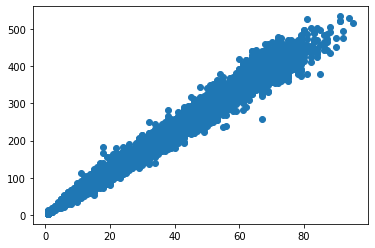

In [ ]:
plt.scatter(x=df['total_word'], y=df['total_char'])

#### Bar

##### Total Word + Label

Kita bisa melihat kombinasi visualisasi antara total_word dan label untuk mencari tahu sentimen apa yang memiliki kata yang paling panjang.

Pada visualisasi di bawah sentimen positif memiliki kata yang paling panjang

<BarContainer object of 93 artists>

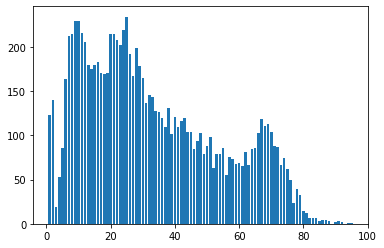

In [ ]:
plt.bar(df['total_word'].value_counts().index, df['total_word'].value_counts())

##### Total Char + Label

Kita bisa melihat kombinasi visualisasi antara total_char dan label untuk mencari tahu sentimen apa yang memiliki kata yang paling panjang.

Pada visualisasi di bawah sentimen positif memiliki karakter yang paling panjang

<BarContainer object of 9836 artists>

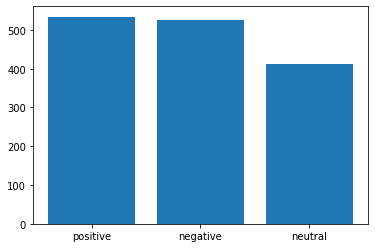

In [ ]:
plt.bar(df['label'], df['total_char'])